Welcome to the Garment Supply Chain Simulation App


Enter the total number of planning periods as an integer number:  10
Enter the total number of washing times for a Garment as an integer:  60
Enter the emmision amount for washing each garment:  0.5
Enter the energy amount for washing each garment:  0.7


   Period  N. Hospitals  Order Size  Mode1 Emission  Mode2 Emission  \
0       1             6       36934           6.105         853.182   
1       2             6       33951           5.610         784.278   
2       3             5       32647           5.379         754.149   
3       4             7       39277           6.468         907.302   
4       5             5       28945           4.785         668.613   
5       6             6       38357           6.336         886.050   
6       7             7       40740           6.732         941.094   
7       8             7       45802           7.557        1058.013   
8       9             6       37581           6.204         868.131   
9      10             7       42900           7.062         990.990   

   Mode1 Energy  Mode2 Energy  Laundry Emission  Laundry Energy  Mode1 Cost  \
0         222.0       31024.8            5540.0          7756.0       370.0   
1         204.0       28519.2            5092.5          712

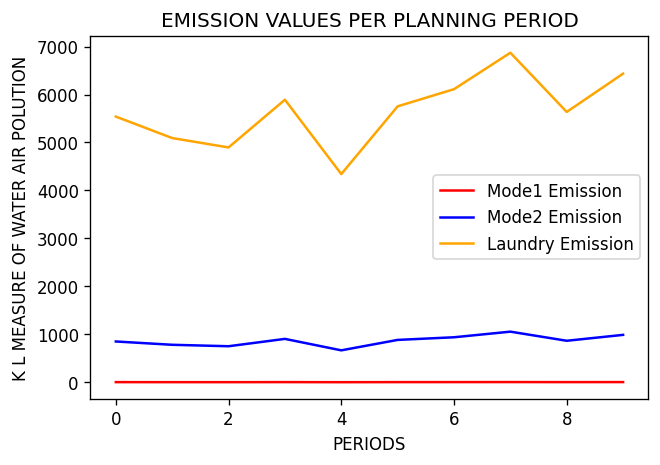

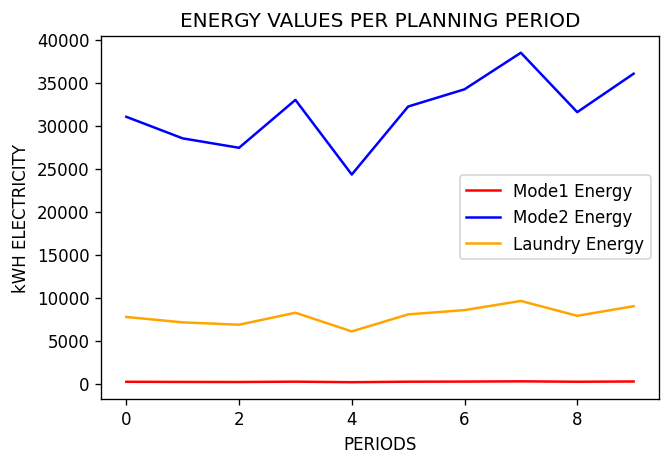

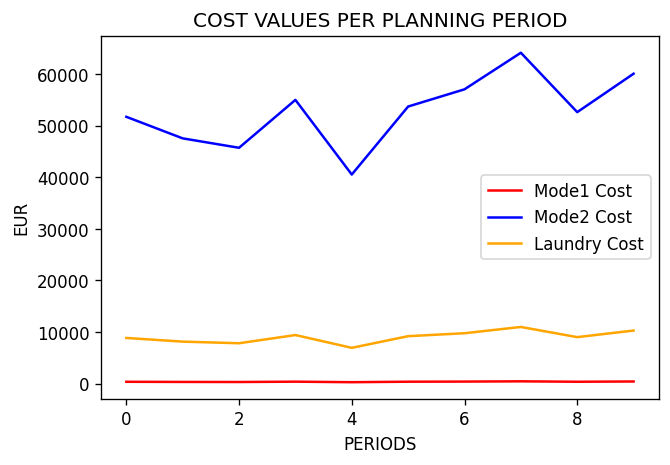

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


print("Welcome to the Garment Supply Chain Simulation App")

total_periods = int(input("Enter the total number of planning periods as an integer number: "))

washing_times = int(input("Enter the total number of washing times for a Garment as an integer: "))

emission_washing_garment=float(input("Enter the emmision amount for washing each garment: "))

energy_washing_garment=float(input("Enter the energy amount for washing each garment: "))



class Laundry:
    def __init__(self, period, ordersize):

        self.period = period
        self.ordersize = ordersize
        self.emission = emission_washing_garment*ordersize  # kg in 60 degree
        self.energy = energy_washing_garment*ordersize  # (kWh/kg)
        self.cost = 0.8*ordersize  # (EUR/Num)

        # waterperorder = 5
        # self.resources = [waterperorder*ordersize]

        # otherperorder = 50
        # self.othercosts = ordersize*otherperorder


class Manufacturer:
    def __init__(self, m_id, cap, period, ordersize, mode):
        self.cap = cap
        self.period = period
        self.ordersize = ordersize
        self.m_id = m_id
        self.mode = mode  # Currently just limited to Two modes
        if mode == 1:
            # Water, emissions to air k l MEASURE OF WATER AIR POLUTION #np.exp(ordersize)
            self.emission = 0.033*ordersize
            self.energy = 1.2*ordersize
            self.cost = 2*ordersize  # (EUR/Num)
            # waterperorder = 20  # Water Per Order
            # fabricperorder = 10  # Fabric Per Order
            # self.resources = [fabricperorder *
            #                   ordersize, waterperorder*ordersize]
            # otherperorder = 50  # Other Costs Per Order
            # self.othercosts = ordersize*otherperorder
        else:
            self.emission = 0.033*ordersize
            self.energy = 1.2*ordersize
            self.cost = 2*ordersize  # (EUR/Num)
            # waterperorder = 20  # Water Per Order
            # fiberperorder = 10  # Fabric Per Order
            # self.resources = [fiberperorder*ordersize, waterperorder*ordersize]
            # otherperorder = 50  # Other Costs Per Order
            #self.othercosts = ordersize*otherperorder
# Manufacturer(m_id, cap, period, ordersize, mode)



class Supply_Chain:
    def __init__(self, period, number_of_hospitals, hospitals_order_size, number_of_manufacturers, number_of_mode1_manu, caplist, assign_to_mode1):

        self.period = period
        self.hospitalnum = number_of_hospitals
        total_order_size = sum(hospitals_order_size)
        self.ordertotal = total_order_size
        self.number_of_mode1_manu = number_of_mode1_manu
        number_of_mode2_manu = number_of_manufacturers-number_of_mode1_manu
        self.number_of_mode2_manu = number_of_mode2_manu
        assign_to_mode1 = round(total_order_size*assign_to_mode1/100)
        self.assign_to_mode1 = assign_to_mode1
        # Total capacity shouldn't be less than total ordersize
        assign_to_mode2 = total_order_size-assign_to_mode1
        self.assign_to_mode2 = assign_to_mode2
        self.assign = [assign_to_mode1, assign_to_mode2]

        manufacturerlist = []
        for manu in range(number_of_manufacturers):
            if manu < number_of_mode1_manu and assign_to_mode1 > 0:

                manufacturer = Manufacturer(
                    manu, caplist[manu], period, min(caplist[manu], round(assign_to_mode1/washing_times)), 1)

                manufacturerlist.append(manufacturer)

                assign_to_mode1 = assign_to_mode1 - \
                    min(caplist[manu], assign_to_mode1)
               # print(f"Orthers to Manufacturer {manu} assigend")
            elif assign_to_mode2 > 0:
                for manu in range(self.number_of_mode2_manu):

                    manufacturer = Manufacturer(
                        manu, caplist[manu], period, min(caplist[manu+self.number_of_mode1_manu], assign_to_mode2), 2)

                    manufacturerlist.append(manufacturer)
                    assign_to_mode2 = assign_to_mode2 - \
                        min(caplist[manu+self.number_of_mode1_manu],
                            assign_to_mode2)

        self.manufacturer = manufacturerlist

        self.laundry = Laundry(self.period, self.assign_to_mode1 -
                               round(assign_to_mode1/washing_times))
        
        
        

        
        
        
supply_chain = []
data_lst = []
# hospitals_order_size1 = []
for periods in range(total_periods):
    #Supply_Chain(period, number_of_hospitals, hospitals_order_size, number_of_manufacturers, number_of_mode1_manu, caplist, assign_to_mode1)
    number_of_hospitals1 = np.random.randint(5, 8)
    sup = Supply_Chain(periods, number_of_hospitals1, list(np.random.randint(
        5000, 7000, size=number_of_hospitals1)), 2, 1, [10**10, 10**10], 30)
    supply_chain.append(sup)
    data_lst.append([periods+1, sup.hospitalnum, sup.ordertotal,
                    sup.manufacturer[0].emission, sup.manufacturer[1].emission, sup.manufacturer[0].energy, sup.manufacturer[1].energy, sup.laundry.emission, sup.laundry.energy, sup.manufacturer[0].cost, sup.manufacturer[1].cost, sup.laundry.cost])


df = pd.DataFrame(data_lst, columns=['Period', "N. Hospitals", "Order Size", "Mode1 Emission",
                  "Mode2 Emission", "Mode1 Energy", "Mode2 Energy", "Laundry Emission", "Laundry Energy", "Mode1 Cost", "Mode2 Cost", "Laundry Cost"])
print(df)

# df.to_csv('file_name.csv')
fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Emission", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Emission", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Emission", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("K L MEASURE OF WATER AIR POLUTION")
plt.title("EMISSION VALUES PER PLANNING PERIOD")
plt.show()

# fig, ax = plt.subplots(dpi=120)
# df.plot(kind="area", y="Mode1 Emission", ax=ax, color="red")
# df.plot(kind="area", y="Mode2 Emission", ax=ax, color="blue")
# df.plot(kind="area", y="Laundry Emission", ax=ax, color="orange")
# ax.set_xlabel("PERIODS")
# ax.set_ylabel("K L MEASURE OF WATER AIR POLUTION")
# plt.title("EMISSION VALUES PER PLANNING PERIOD")
# plt.show()

fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Energy", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Energy", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Energy", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("kWH ELECTRICITY")
plt.title("ENERGY VALUES PER PLANNING PERIOD")
plt.show()

fig, ax = plt.subplots(dpi=120)
df.plot(kind="line", y="Mode1 Cost", ax=ax, color="red")
df.plot(kind="line", y="Mode2 Cost", ax=ax, color="blue")
df.plot(kind="line", y="Laundry Cost", ax=ax, color="orange")
ax.set_xlabel("PERIODS")
ax.set_ylabel("EUR")
plt.title("COST VALUES PER PLANNING PERIOD")
plt.show()